<a href="https://colab.research.google.com/github/MirzaGe/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/master/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# Load the data
data = load_breast_cancer()

In [4]:
# check the type of 'data'
type (data)

sklearn.utils.Bunch

In [5]:
#note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [7]:
# ' targets'
data. target
# note how the targets are just 0s and 1s
# normally, when you have k targets, they are labeled 0..k-1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [10]:
# you can also determine the meaning of each feature 
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# namormally we would put all our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test seta
# this lets us simulate how our model will perform in the future

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
# scale the data
# you'll learn why scaling is needed later
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Now all the fun starts with tensorflow stuff
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [32]:
import tensorflow as tf
import keras


Using TensorFlow backend.


In [37]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5415 - accuracy: 0.8084 - val_loss: 0.5526 - val_accuracy: 0.7340
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4867 - accuracy: 0.8346 - val_loss: 0.4973 - val_accuracy: 0.8191
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4406 - accuracy: 0.8635 - val_loss: 0.4521 - val_accuracy: 0.8617
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4030 - accuracy: 0.8871 - val_loss: 0.4148 - val_accuracy: 0.8777
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.9055 - val_loss: 0.3839 - val_accuracy: 0.8883
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.9213 - val_loss: 0.3583 - val_accuracy: 0.8989
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.9291 - val_loss: 0.3365 - val_accuracy: 0.8989
Epoch 8/100


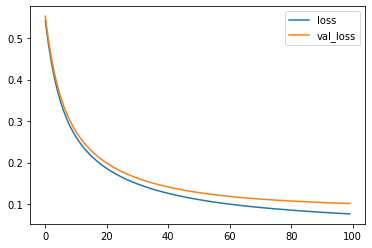

In [38]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

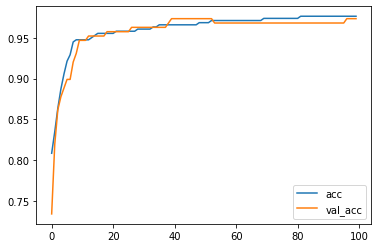

In [39]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()